In [9]:
from functools import partial
import pickle as pkl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment

In [10]:
fname = os.environ["PROJECT_DIR"] + "/resources/soepcore_struct_prep.dta"
df_obs = pd.read_stata(fname, convert_categoricals = False)
df_obs = df_alignment(df_obs)

In [11]:
os.chdir("/home/peisenha/structExpectations/development/estimations/exploration_peisenha")

In [12]:
model_params_step = pd.read_pickle("step.soepy.pkl")

In [13]:
model_params_step

value     upper       lower  fixed
category      name                                                
const_wage_eq gamma_0s1      1.894936     3.700    1.380000   True
              gamma_0s2      1.923508     3.700    1.380000   True
              gamma_0s3      2.212359     3.700    1.380000   True
exp_returns   gamma_1s1      0.151907     0.500    0.001000   True
              gamma_1s2      0.232615     0.500    0.001000   True
              gamma_1s3      0.256144     0.500    0.001000   True
exp_accm      g_s1           0.100000     0.500    0.001000   True
              g_s2           0.200000     0.500    0.001000   True
              g_s3           0.250000     0.500    0.001000   True
exp_deprec    delta_s1       0.020000     0.200    0.001000   True
              delta_s2       0.020000     0.200    0.001000   True
              delta_s3       0.020000     0.200    0.001000   True
hetrg_unobs   theta_p1       0.000000    -0.000   -0.103099   True
              theta_f1       0.000000    -0.000   -0.134978   True
shares        share_1        0.000000     0.950   -0.001000   True
sd_wage_shock sigma_1        0.389763     1.000    0.001000   True
              sigma_2        0.439060     1.000    0.001000   True
disutil_work  no_kids_f      0.222039     2.000    0.001000  False
              no_kids_p     -0.200625    -0.001   -1.500000  False
              yes_kids_f     0.908254     2.000    0.001000  False
              yes_kids_p    -0.715843    -0.001   -1.500000  False
              child_02_f     0.108120     0.200    0.001000   True
              child_02_p    -0.018120    -0.001   -1.500000   True
              child_35_f     0.013053     0.200    0.001000   True
              child_35_p    -0.048731    -0.001   -1.500000   True
              child_610_f    0.005738     0.200    0.001000   True
              child_610_p   -0.126447    -0.001   -1.500000   True
benefits_base              200.000000  1000.000  100.000000   True
delta                        0.980000     0.990    0.900000   True
mu                          -0.560000    -0.990   -0.010000   True

In [14]:
df_sim_step = soepy.simulate(model_params_step, "resources/model_spec_init.yml")
df_sim_step = df_alignment(df_sim_step)

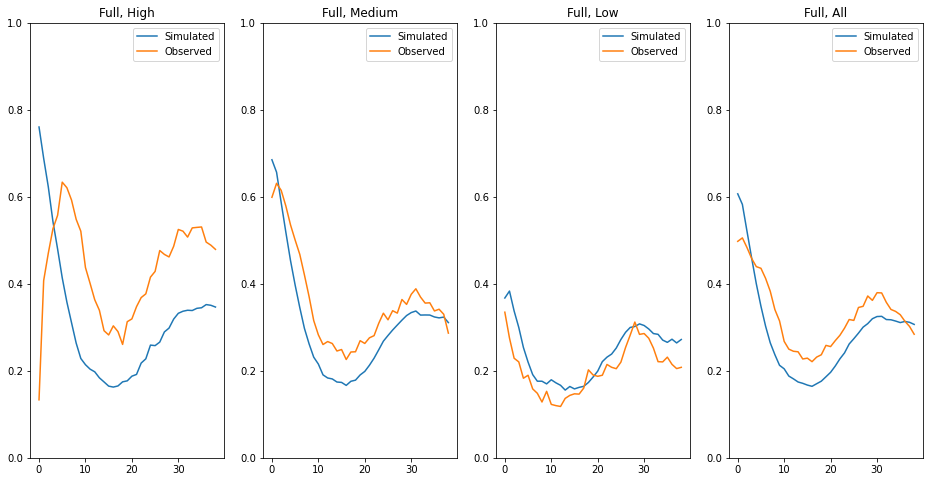

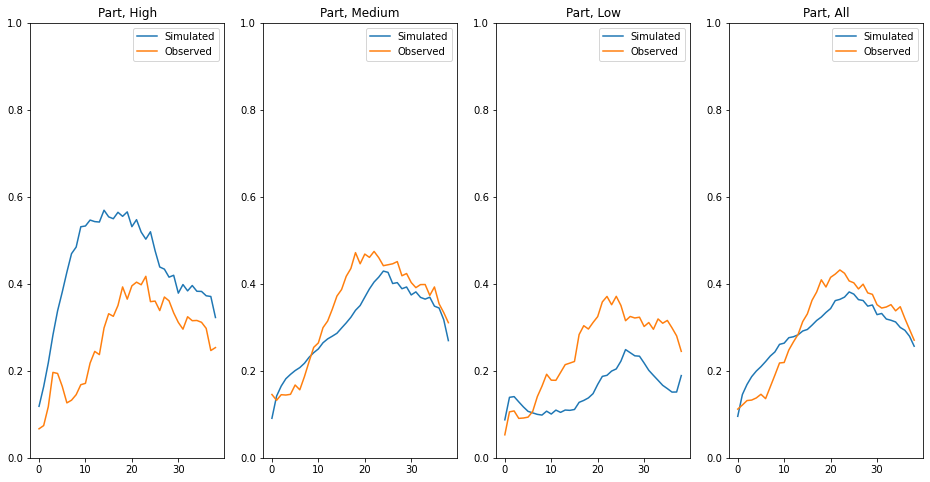

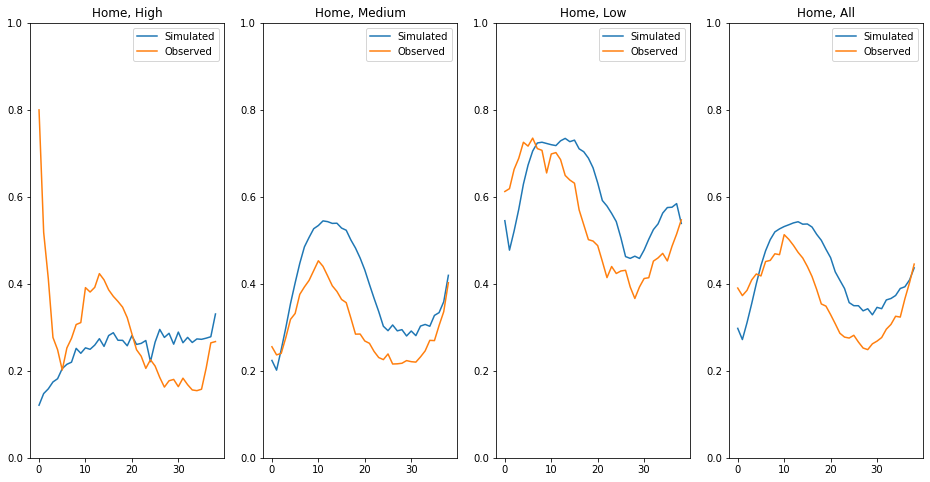

In [15]:
plot_basics_choices(df_sim=df_sim_step, df_obs=df_obs)

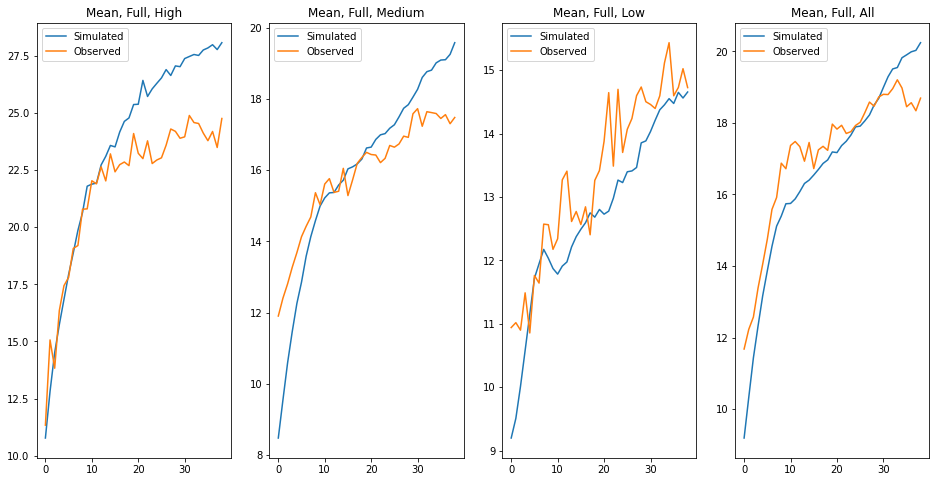

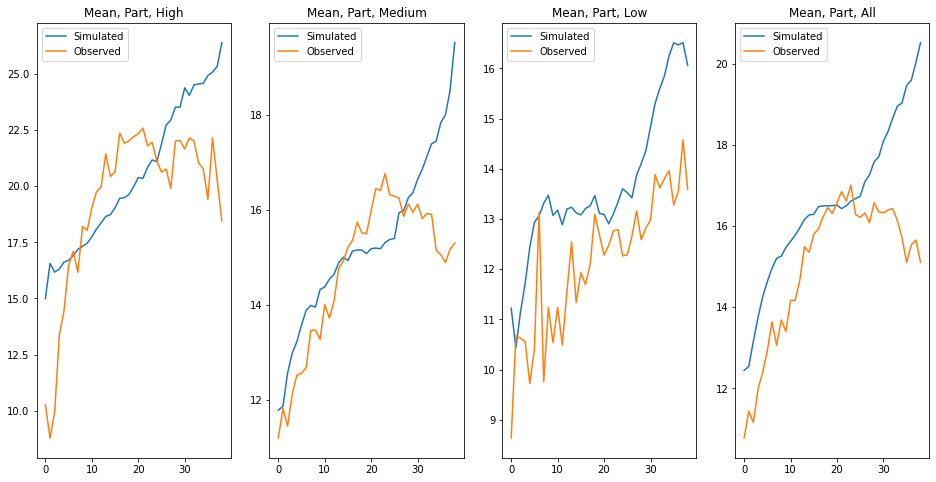

In [16]:
plot_basics_wages(df_sim=df_sim_step, df_obs=df_obs)

In [34]:
df_sim_step["Education_Level"]

Index(['Education_Level', 'Lagged_Choice', 'Experience_Part_Time',
       'Experience_Full_Time', 'Type', 'Age_Youngest_Child',
       'Partner_Indicator', 'Choice', 'Log_Systematic_Wage', 'Period_Wage_P',
       'Period_Wage_F', 'Non_Consumption_Utility_N',
       'Non_Consumption_Utility_P', 'Non_Consumption_Utility_F',
       'Flow_Utility_N', 'Flow_Utility_P', 'Flow_Utility_F',
       'Continuation_Value_N', 'Continuation_Value_P', 'Continuation_Value_F',
       'Value_Function_N', 'Value_Function_P', 'Value_Function_F',
       'Wage_Observed'],
      dtype='object')

In [62]:
def get_moments(df):
    num_periods = df.index.get_level_values("Period").max()

    # Chioce probabilites in each period.
    df_probs_grid = pd.DataFrame(data=0, columns=["Value"], index=pd.MultiIndex.from_product(
        [list(range(num_periods)), ["Home", "Part", "Full"]], names=["Period", "Choice"]))
    df_probs = df.groupby("Period").Choice.value_counts(normalize=True).rename("Value")
    df_probs_grid.update(df_probs)
    moments = list(df_probs_grid.sort_index().values[:, 0])

    
    df_wages_grid = pd.DataFrame(data=0, columns=["Value"], index=pd.MultiIndex.from_product(
        [list(range(39)), ["Part", "Full"],  ["High", "Medium", "Low"]], names=["Period", "Choice", "Education_Level"]))

    df_sim_working = df[df["Choice"].isin(["Full", "Part"])]
    df_wage = df_sim_working.groupby(["Period", "Choice", "Education_Level"])["Wage_Observed"].mean().rename("Value")

    df_wages_grid.update(df_wage)
    moments += list(df_wages_grid.sort_index().values[:, 0])

    

In [64]:

moments = get_moments(df_obs)


NameError: name 'df_sim' is not defined

In [60]:
moments

[11.338558197021484,
 10.940138816833496,
 11.90327262878418,
 10.269230842590332,
 8.634936332702637,
 11.202037811279297,
 15.066917419433594,
 11.017365455627441,
 12.405757904052734,
 8.783428192138672,
 10.674765586853027,
 11.826732635498047,
 13.829790115356445,
 10.899081230163574,
 12.806150436401367,
 9.958720207214355,
 10.623222351074219,
 11.45242977142334,
 16.35369110107422,
 11.487578392028809,
 13.27291202545166,
 13.381378173828125,
 10.557458877563477,
 12.128751754760742,
 17.44119644165039,
 10.855095863342285,
 13.682955741882324,
 14.430055618286133,
 9.720913887023926,
 12.524818420410156,
 17.802173614501953,
 11.761439323425293,
 14.131357192993164,
 16.48600959777832,
 10.406828880310059,
 12.565535545349121,
 19.066410064697266,
 11.641678810119629,
 14.423446655273438,
 17.099332809448242,
 13.134115219116211,
 12.681706428527832,
 19.194238662719727,
 12.571781158447266,
 14.684648513793945,
 16.161338806152344,
 9.750065803527832,
 13.469070434570312,
 20